## **Movie Rating Prediction Model**

#### Necessary Libraries

In [21]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import joblib

**Background**

The TMDB Movie Database is a comprehensive dataset containing information about movies. It includes columns such as ID, Title, Average Vote, Vote Count, Status, Release Date, Revenue, Runtime, and various other attributes.

Please find the details for the dataset attributes:-

1. **id** :- Unique identifier for each movie.
2. **title** :- Title of the movie.
3. **vote_average** :- Average vote or rating given by viewers.
4. **vote_count** :- Total count of votes received for the movie.
5. **status** :- The status of the movie (e.g.,         Released, Rumored, Post Production, etc.).
6. **release_date** :- Date when the movie was released.
7. **revenue** :- Total revenue generated by the movie.
8. **runtime** :- Duration of the movie in minutes.
9. **adult** :- Indicates if the movie is suitable only for adult audiences.
10. **backdrop_path** :- URL of the backdrop image for the movie.
11. **budget** :- Budget allocated for the movie.
12. **homepage** :- Official homepage URL of the movie.
13. **imdb_id** :- IMDb ID of the movie. 
14. **original_title** :- Original title of the movie
15. **overview** :- Brief description or summary of the movie.
16. **popularity** :- Popularity score of the movie
17. **poster_path** :- URL of the movie poster image.
18. **tagline** :- Catchphrase or memorable line associated with the movie.
19. **genres** :- List of genres the movie belongs to.
20. **production_companies** :- List of production companies involved in the movie. 
21. **production_countries** :- List of countries involved in the movie production.
22. **spoken_languages** :- List of languages spoken in the movie
23. **keywords** :- Keywords associated with the movie.
24. **original_language** :- Original language in which the movie was produced.

**Case Study**


The dataset here gives the massive information about the movies and their average ratings from platforms like: IMDb, Rotten Tomatoes, etc. We are going to analyze each and every factors which can influence these ratings so that we can predict better results.The movie with the higher score is more successful as compared to the movies with low score. 

**Orignal Dataset Inspection**

Reading the orignal dataset and checking the attributes keeping data from specific columns and dropping the unnecessary columns and make a new modified dataset so that we do not have to read the full dataset again and again ...

In [ ]:
df = pd.read_csv("TMDB_Dataset_Updated.csv")  # Read the CSV file into a DataFrame

df.drop(  # Drop the unnecessary columns 'backdrop_path', 'poster_path' etc and those Columns with majority NULL Values.
    columns=[
        "backdrop_path",
        "poster_path",
        "homepage",
        "tagline",
        "keywords",
        "spoken_languages",
        "original_title",
        "production_companies",
        "production_countries",
        "overview",
        "id",
    ],
    inplace=True,
)

df = df[
    (df["adult"] == False) & (df["status"] == "Released")
]  # Keep only rows where the 'adult' column is False and the 'status' column is "Released"

df = df.rename(  # Rename the "vote_average" column to "average_rating" and "orignal_language" to "language"
    columns={"vote_average": "average_rating", "original_language": "language"}
)

df.drop(
    columns=["adult", "status", "imdb_id"], inplace=True
)  # Drop the more useless column

df.head()

title  average_rating  vote_count release_date     revenue  \
0        Inception           8.364       34495   2010-07-15   825532764   
1     Interstellar           8.417       32571   2014-11-05   701729206   
2  The Dark Knight           8.512       30619   2008-07-16  1004558444   
3           Avatar           7.573       29815   2009-12-15  2923706026   
4     The Avengers           7.710       29166   2012-04-25  1518815515   

   runtime     budget language  popularity  \
0      148  160000000       en      83.952   
1      169  165000000       en     140.241   
2      152  185000000       en     130.643   
3      162  237000000       en      79.932   
4      143  220000000       en      98.082   

                                        genres  
0           Action, Science Fiction, Adventure  
1            Adventure, Drama, Science Fiction  
2               Drama, Action, Crime, Thriller  
3  Action, Adventure, Fantasy, Science Fiction  
4           Science Fiction, Action, Adventure

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 998193 entries, 0 to 1128266
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   title           998183 non-null  object 
 1   average_rating  998193 non-null  float64
 2   vote_count      998193 non-null  int64  
 3   release_date    842713 non-null  object 
 4   revenue         998193 non-null  int64  
 5   runtime         998193 non-null  int64  
 6   budget          998193 non-null  int64  
 7   language        998193 non-null  object 
 8   popularity      998193 non-null  float64
 9   genres          646951 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 83.8+ MB


Converting the **date** to **"datetime"** format

In [24]:
df["release_date"] = pd.to_datetime(df["release_date"], errors="coerce")
# Drop rows with NaT values in release_date
df = df.dropna(subset=["release_date"])

**Checking missing values per column...**

In [25]:
missing_values_per_column = df.isnull().sum()
print("Missing values per column:")
print(missing_values_per_column)

Missing values per column:
title                  4
average_rating         0
vote_count             0
release_date           0
revenue                0
runtime                0
budget                 0
language               0
popularity             0
genres            222506
dtype: int64


**Setting a threshold for "language"**

Filtering the dataframe and keeping only those languages that have at least 4000 movies released.

In [26]:
language_counts = df["language"].value_counts()
threshold = 4000
languages_to_keep = language_counts[language_counts >= threshold].index
# Filter the DataFrame to keep only the selected languages
df = df[df["language"].isin(languages_to_keep)]

In [ ]:
# Create a dictionary to map language codes to full names
language_codes = {
    "en": "English",
    "ko": "Korean",
    "fr": "French",
    "ja": "Japanese",
    "it": "Italian",
    "es": "Spanish",
    "pl": "Polish",
    "pt": "Portuguese",
    "hi": "Hindi",
    "tr": "Turkish",
    "da": "Danish",
    "de": "German",
    "cn": "Chinese",
    "id": "Indonesian",
    "zh": "Chinese",
    "sv": "Swedish",
    "el": "Greek",
    "ru": "Russian",
    "fa": "Persian",
    "ar": "Arabic",
    "nl": "Dutch",
    "hu": "Hungarian",
    "xx": "Unknown",
    "cs": "Czech",
    "ml": "Malayalam",
    "ta": "Tamil",
    "tl": "Tagalog",
}

df["language"] = df["language"].map(language_codes)
# Now, the 'language' column will contain the full language names

In [ ]:
unique_languages = df["language"].unique()
print("Number of unique languages:", len(unique_languages))
print("Unique languages:", unique_languages)

Number of unique languages: 22
Unique languages: ['English' 'Korean' 'French' 'Japanese' 'Italian' 'Spanish' 'Polish'
 'Portuguese' 'Hindi' 'Turkish' 'Danish' 'German' 'Chinese' 'Swedish'
 'Greek' 'Russian' 'Arabic' 'Dutch' 'Unknown' 'Czech' 'Tamil' 'Tagalog']


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 781343 entries, 0 to 1128266
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   title           781339 non-null  object        
 1   average_rating  781343 non-null  float64       
 2   vote_count      781343 non-null  int64         
 3   release_date    781343 non-null  datetime64[ns]
 4   revenue         781343 non-null  int64         
 5   runtime         781343 non-null  int64         
 6   budget          781343 non-null  int64         
 7   language        781343 non-null  object        
 8   popularity      781343 non-null  float64       
 9   genres          568567 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 65.6+ MB


Dropping those movies that have **"revenue",** **"runtime"** & **"budget"** all **<=1** (zero & negative numbers)

In [30]:
df = df[~((df["revenue"] <= 1) & (df["runtime"] <= 1) & (df["budget"] <= 1))]

**Making separate columns for "Date" and keeping the movies from 1920 onwards because actual usable data lies in this range**


In [31]:
df["release_year"] = df["release_date"].dt.year
df["release_month"] = df["release_date"].dt.month
df["release_day_of_week"] = df["release_date"].dt.dayofweek

df = df[(df["release_year"] > 1919) & (df["release_year"] < 2025)]

**Removing the duplicate values in the dataset...**

**Dropping the rows with missing values...**

In [32]:
df.drop_duplicates(inplace=True)
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 454648 entries, 0 to 1128266
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   title                454648 non-null  object        
 1   average_rating       454648 non-null  float64       
 2   vote_count           454648 non-null  int64         
 3   release_date         454648 non-null  datetime64[ns]
 4   revenue              454648 non-null  int64         
 5   runtime              454648 non-null  int64         
 6   budget               454648 non-null  int64         
 7   language             454648 non-null  object        
 8   popularity           454648 non-null  float64       
 9   genres               454648 non-null  object        
 10  release_year         454648 non-null  int32         
 11  release_month        454648 non-null  int32         
 12  release_day_of_week  454648 non-null  int32         
dtypes: datetime64[ns](

#### "We can say we have the dataset divided into categorical and numeric columns"

**Categorical Columns**

    title
    language
    genres

**Numerical Columns**

    average_rating
    vote_count
    revenue
    runtime
    budget 
    popularity 

In [33]:
df.head()

title  average_rating  vote_count release_date     revenue  \
0        Inception           8.364       34495   2010-07-15   825532764   
1     Interstellar           8.417       32571   2014-11-05   701729206   
2  The Dark Knight           8.512       30619   2008-07-16  1004558444   
3           Avatar           7.573       29815   2009-12-15  2923706026   
4     The Avengers           7.710       29166   2012-04-25  1518815515   

   runtime     budget language  popularity  \
0      148  160000000  English      83.952   
1      169  165000000  English     140.241   
2      152  185000000  English     130.643   
3      162  237000000  English      79.932   
4      143  220000000  English      98.082   

                                        genres  release_year  release_month  \
0           Action, Science Fiction, Adventure          2010              7   
1            Adventure, Drama, Science Fiction          2014             11   
2               Drama, Action, Crime, Thriller          2008              7   
3  Action, Adventure, Fantasy, Science Fiction          2009             12   
4           Science Fiction, Action, Adventure          2012              4   

   release_day_of_week  
0                    3  
1                    2  
2                    2  
3                    1  
4                    2

In [34]:
df.to_csv(
    "TMDB_dataset_updated_modified.csv", index=False
)  # Save the Modified DataFrame back to the CSV file

**Reading the new "Modified Dataset"**

In [ ]:
df = pd.read_csv("TMDB_dataset_updated_modified.csv")
df.head()

title  average_rating  vote_count release_date     revenue  \
0        Inception           8.364       34495   2010-07-15   825532764   
1     Interstellar           8.417       32571   2014-11-05   701729206   
2  The Dark Knight           8.512       30619   2008-07-16  1004558444   
3           Avatar           7.573       29815   2009-12-15  2923706026   
4     The Avengers           7.710       29166   2012-04-25  1518815515   

   runtime     budget language  popularity  \
0      148  160000000  English      83.952   
1      169  165000000  English     140.241   
2      152  185000000  English     130.643   
3      162  237000000  English      79.932   
4      143  220000000  English      98.082   

                                        genres  release_year  release_month  \
0           Action, Science Fiction, Adventure          2010              7   
1            Adventure, Drama, Science Fiction          2014             11   
2               Drama, Action, Crime, Thriller          2008              7   
3  Action, Adventure, Fantasy, Science Fiction          2009             12   
4           Science Fiction, Action, Adventure          2012              4   

   release_day_of_week  
0                    3  
1                    2  
2                    2  
3                    1  
4                    2

**Five point summary for the numerical columns in the dataset**

In [ ]:
df_temp = df[
    ["average_rating", "vote_count", "revenue", "runtime", "budget", "popularity"]
].copy()
df_temp.describe().T

count          mean           std  min   25%     50%  \
average_rating  454648.0  3.067264e+00  3.261368e+00  0.0   0.0   2.000   
vote_count      454648.0  4.619580e+01  5.022268e+02  0.0   0.0   1.000   
revenue         454648.0  1.608857e+06  2.666709e+07  0.0   0.0   0.000   
runtime         454648.0  6.612538e+01  6.171863e+01  0.0  20.0  75.000   
budget          454648.0  6.088614e+05  7.075597e+06  0.0   0.0   0.000   
popularity      454648.0  2.077450e+00  1.094789e+01  0.0   0.6   0.708   

                   75%           max  
average_rating   6.000  1.000000e+01  
vote_count       4.000  3.449500e+04  
revenue          0.000  3.000000e+09  
runtime         94.000  1.440000e+04  
budget           0.000  8.880000e+08  
popularity       1.484  2.994357e+03

**Boolean check for the missing values in the dataset**

In [37]:
df.isna().any()

title                  False
average_rating         False
vote_count             False
release_date           False
revenue                False
runtime                False
budget                 False
language               False
popularity             False
genres                 False
release_year           False
release_month          False
release_day_of_week    False
dtype: bool

In [38]:
df.tail()

title  average_rating  \
454643                           Hedgehogs and The City             0.0   
454644                                    Isle of Seals             0.0   
454645                    How to Get Away With Cheating             0.0   
454646                                   Once My Mother             0.0   
454647  Honkai: Star Rail - Harmony Greets the New Year             0.0   

        vote_count release_date  revenue  runtime  budget language  \
454643           0   2012-12-21        0       10       0  Unknown   
454644           0   2014-05-04        0        7       0  Unknown   
454645           0   2018-01-01        0      105       0  English   
454646           0   2014-07-24        0       75       0  English   
454647           0   2024-02-07        0        4       0  English   

        popularity                             genres  release_year  \
454643         0.6                          Animation          2012   
454644         0.6                          Animation          2014   
454645         0.6                           Thriller          2018   
454646         0.6  History, Documentary, War, Family          2014   
454647         0.6         Animation, Science Fiction          2024   

        release_month  release_day_of_week  
454643             12                    4  
454644              5                    6  
454645              1                    0  
454646              7                    3  
454647              2                    2

### *Exploratory Data Analysis on cleaned dataset...* 

Following is the graph plotted for "Number of Movies Released Over the Years" from 1920-2024

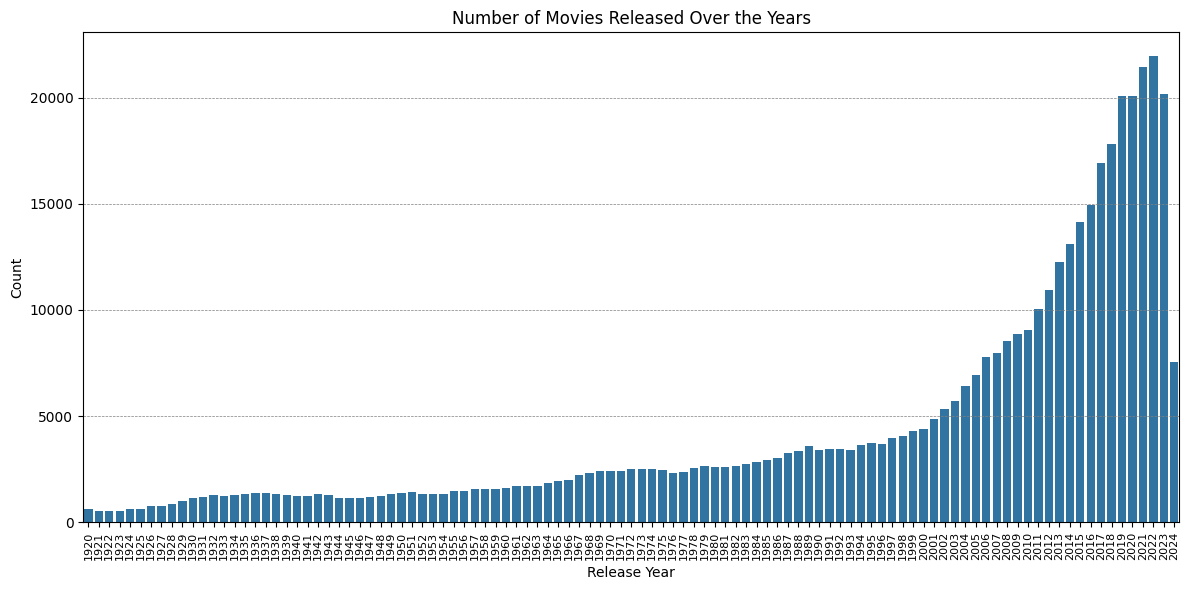

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x="release_year", data=df)
plt.title("Number of Movies Released Over the Years")
plt.xticks(rotation=90, fontsize=8)
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.grid(True, linestyle="--", linewidth=0.5, color="gray", which="both", axis="y")
plt.tight_layout()
plt.show()

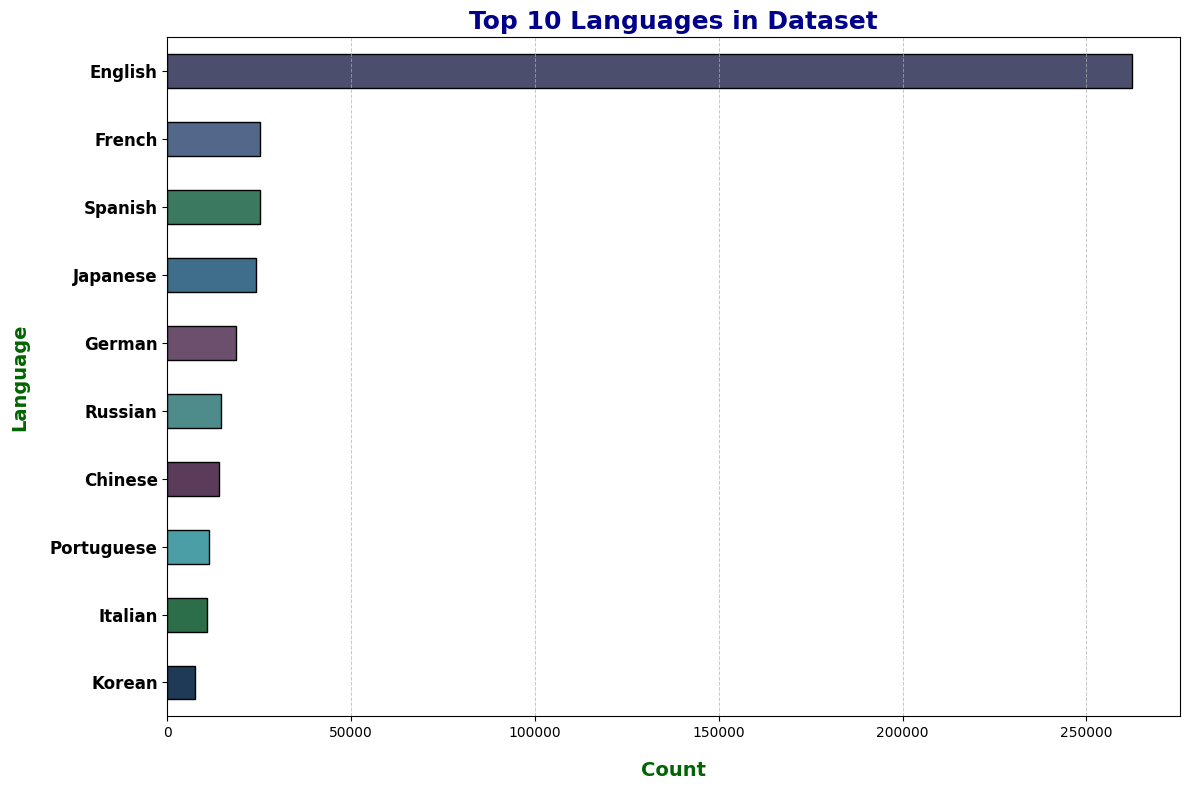

In [40]:
import matplotlib.pyplot as plt

language_counts = df["language"].value_counts()
top_10_languages = language_counts.head(10).sort_values(ascending=True)
plt.figure(figsize=(12, 8))


colors = [
    "#1F3A56",
    "#2C6E49",
    "#4B9EA6",
    "#5A3C5A",
    "#4E8B8B",
    "#6C4F6D",
    "#3E6E8A",
    "#3B7A60",
    "#51688B",
    "#4B4E6D",
]

top_10_languages.plot(kind="barh", color=colors, edgecolor="black")

plt.title(
    "Top 10 Languages in Dataset",  # Title of the graph
    fontsize=18,
    weight="bold",
    color="darkblue",  # Dark blue color for the title
)
plt.xlabel(
    "Count",
    fontsize=14,
    weight="bold",
    color="darkgreen",  # Dark green color for the x-axis label
    labelpad=15,
)
plt.ylabel(
    "Language",
    fontsize=14,
    weight="bold",
    color="darkgreen",  # Dark green color for the y-axis label
    labelpad=15,
)

# Rotate y-axis labels to be horizontal
plt.yticks(fontsize=12, weight="bold", color="black")
plt.grid(axis="x", linestyle="--", linewidth=0.7, alpha=0.7)
plt.tight_layout()
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_6196\3925349986.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


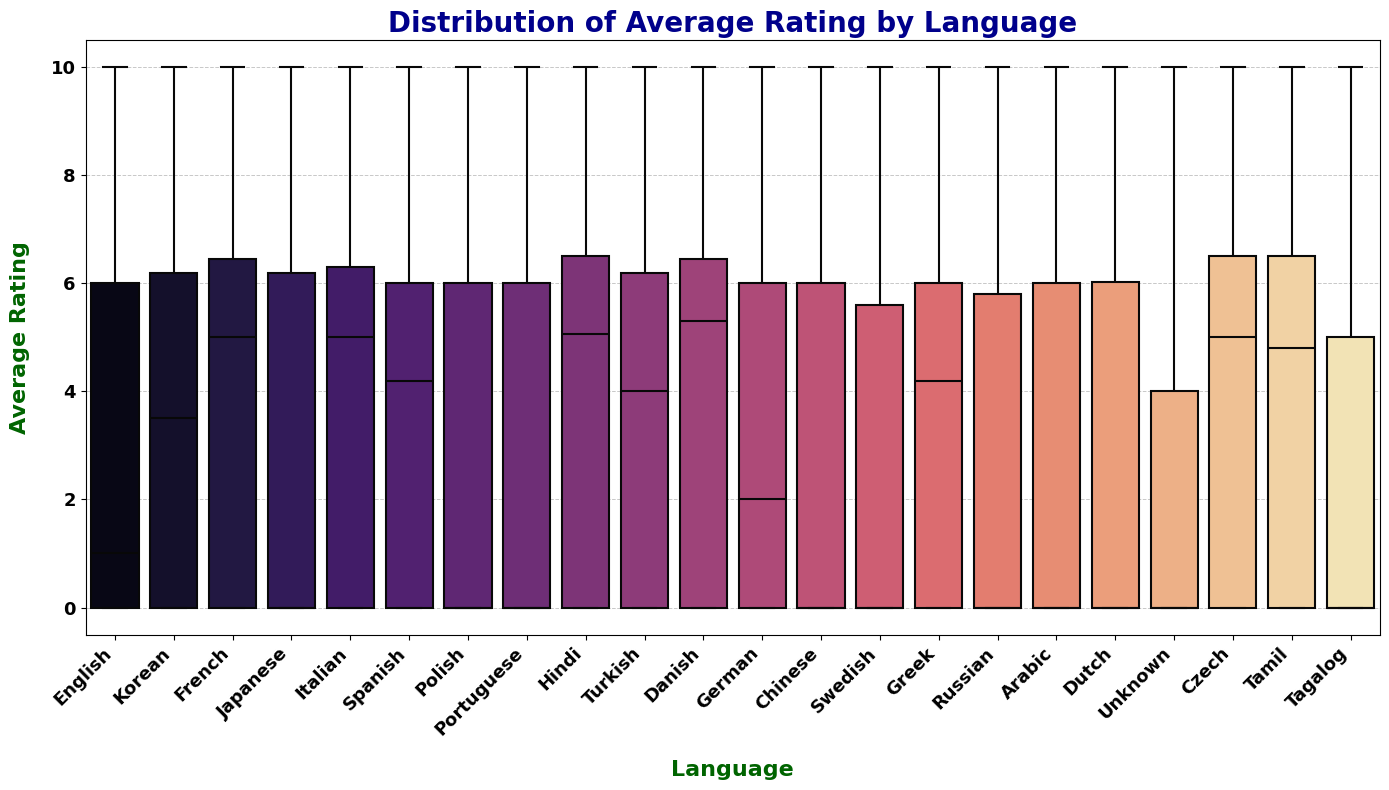

In [ ]:
plt.figure(figsize=(14, 8))  # Plotting
sns.boxplot(x="language", y="average_rating", data=df, palette="magma", linewidth=1.5)

plt.title(  # Title and labels with styling
    "Distribution of Average Rating by Language",
    fontsize=20,
    weight="bold",
    color="darkblue",
)
plt.xlabel("Language", fontsize=16, weight="bold", color="darkgreen", labelpad=15)
plt.ylabel("Average Rating", fontsize=16, weight="bold", color="darkgreen", labelpad=15)
plt.xticks(rotation=45, ha="right", fontsize=13, weight="bold", color="black")
plt.yticks(fontsize=13, weight="bold", color="black")

plt.grid(axis="y", linestyle="--", linewidth=0.7, alpha=0.7)
# Add grid for y-axis
plt.tight_layout()

plt.show()

### Univariate Analysis

#### Histograms plotted for univariate analysis of "Numerical Data":

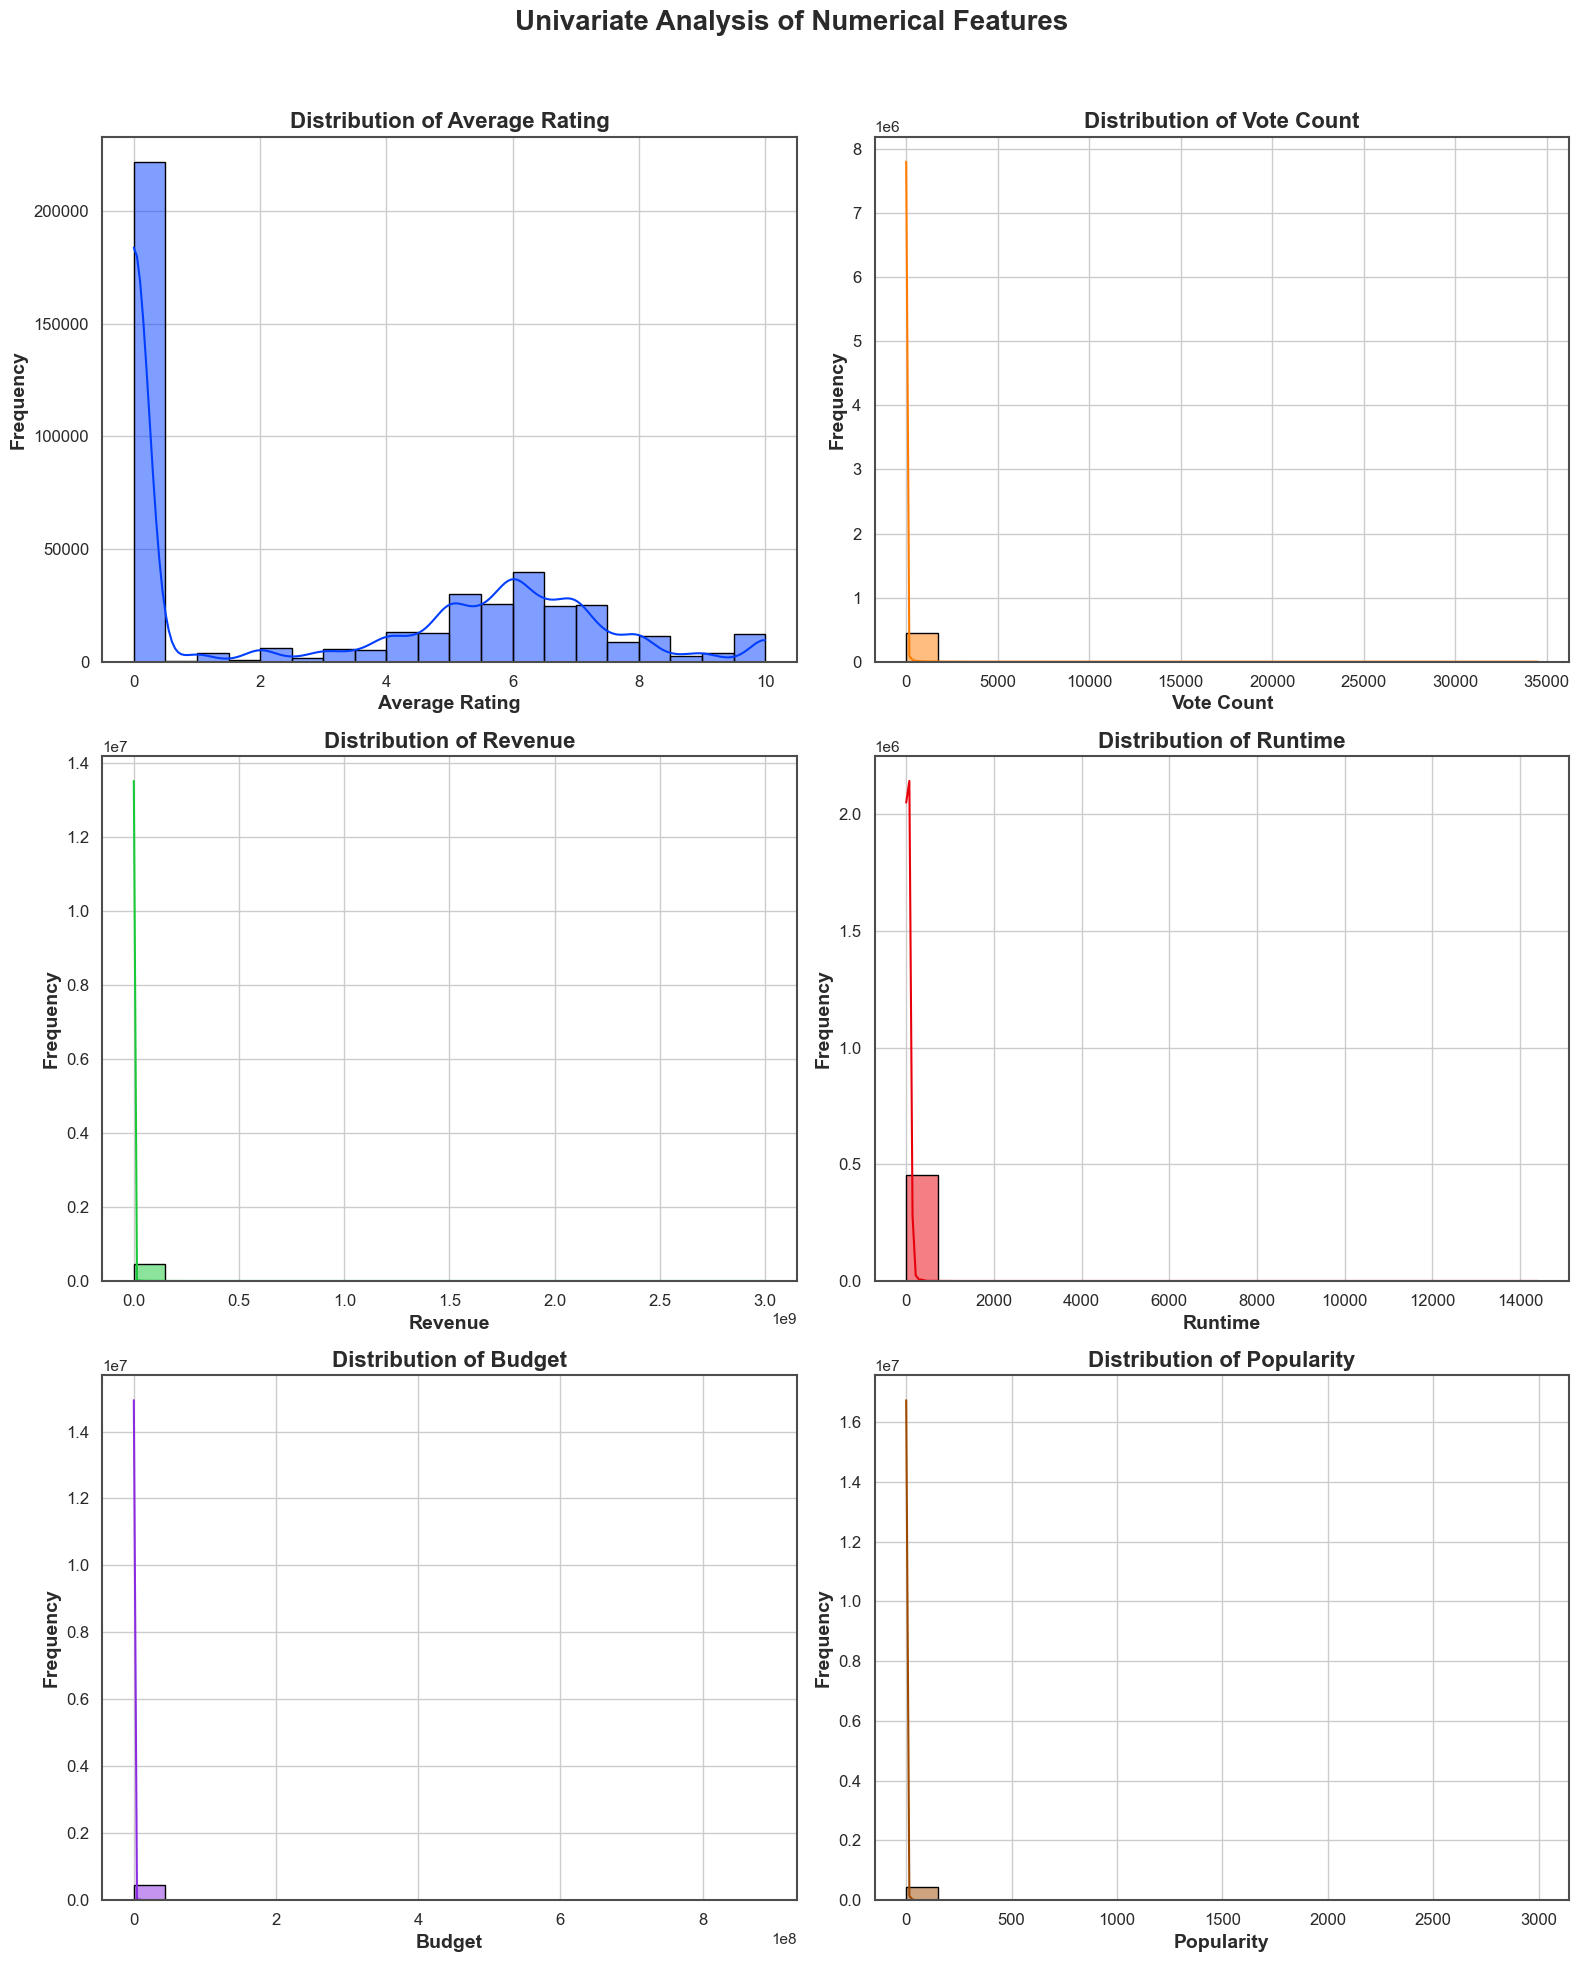

In [42]:
full_feature_names = {
    "average_rating": "Average Rating",
    "vote_count": "Vote Count",
    "revenue": "Revenue",
    "runtime": "Runtime",
    "budget": "Budget",
    "popularity": "Popularity",
}

# Select numerical features excluding certain columns
numerical_features = df.select_dtypes(include=["int64", "float64"]).columns
numerical_features = [
    feature
    for feature in numerical_features
    if feature not in ["release_year", "release_month", "release_day_of_week"]
]

sns.set_theme(style="whitegrid")
palette = sns.color_palette("bright", len(numerical_features))

fig, axes = plt.subplots(
    nrows=len(numerical_features) // 2 + len(numerical_features) % 2,
    ncols=2,
    figsize=(16, 20),
)
axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    # Use the full name from the dictionary, default to the feature name if not found
    feature_full_name = full_feature_names.get(feature, feature)

    # Create histograms with KDE for each numerical feature
    sns.histplot(
        df[feature], bins=20, kde=True, ax=axes[i], color=palette[i], edgecolor="black"
    )

    # Set the title and labels using the full names
    axes[i].set_title(
        f"Distribution of {feature_full_name}",
        fontsize=16,
        fontweight="bold",
        color="#2A2A2A",
    )
    axes[i].set_xlabel(
        feature_full_name, fontsize=14, fontweight="bold", color="#2A2A2A"
    )
    axes[i].set_ylabel("Frequency", fontsize=14, fontweight="bold", color="#2A2A2A")

    # Customize ticks and spine color
    axes[i].tick_params(colors="#2A2A2A", labelsize=12)
    for spine in axes[i].spines.values():
        spine.set_edgecolor("#4D4D4D")
        spine.set_linewidth(1.5)

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Set the overall figure title
plt.suptitle(
    "Univariate Analysis of Numerical Features",
    fontsize=20,
    fontweight="bold",
    color="#2A2A2A",
)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### Bivariate Analysis Graphs

#### Scatter Plot for Relationships:

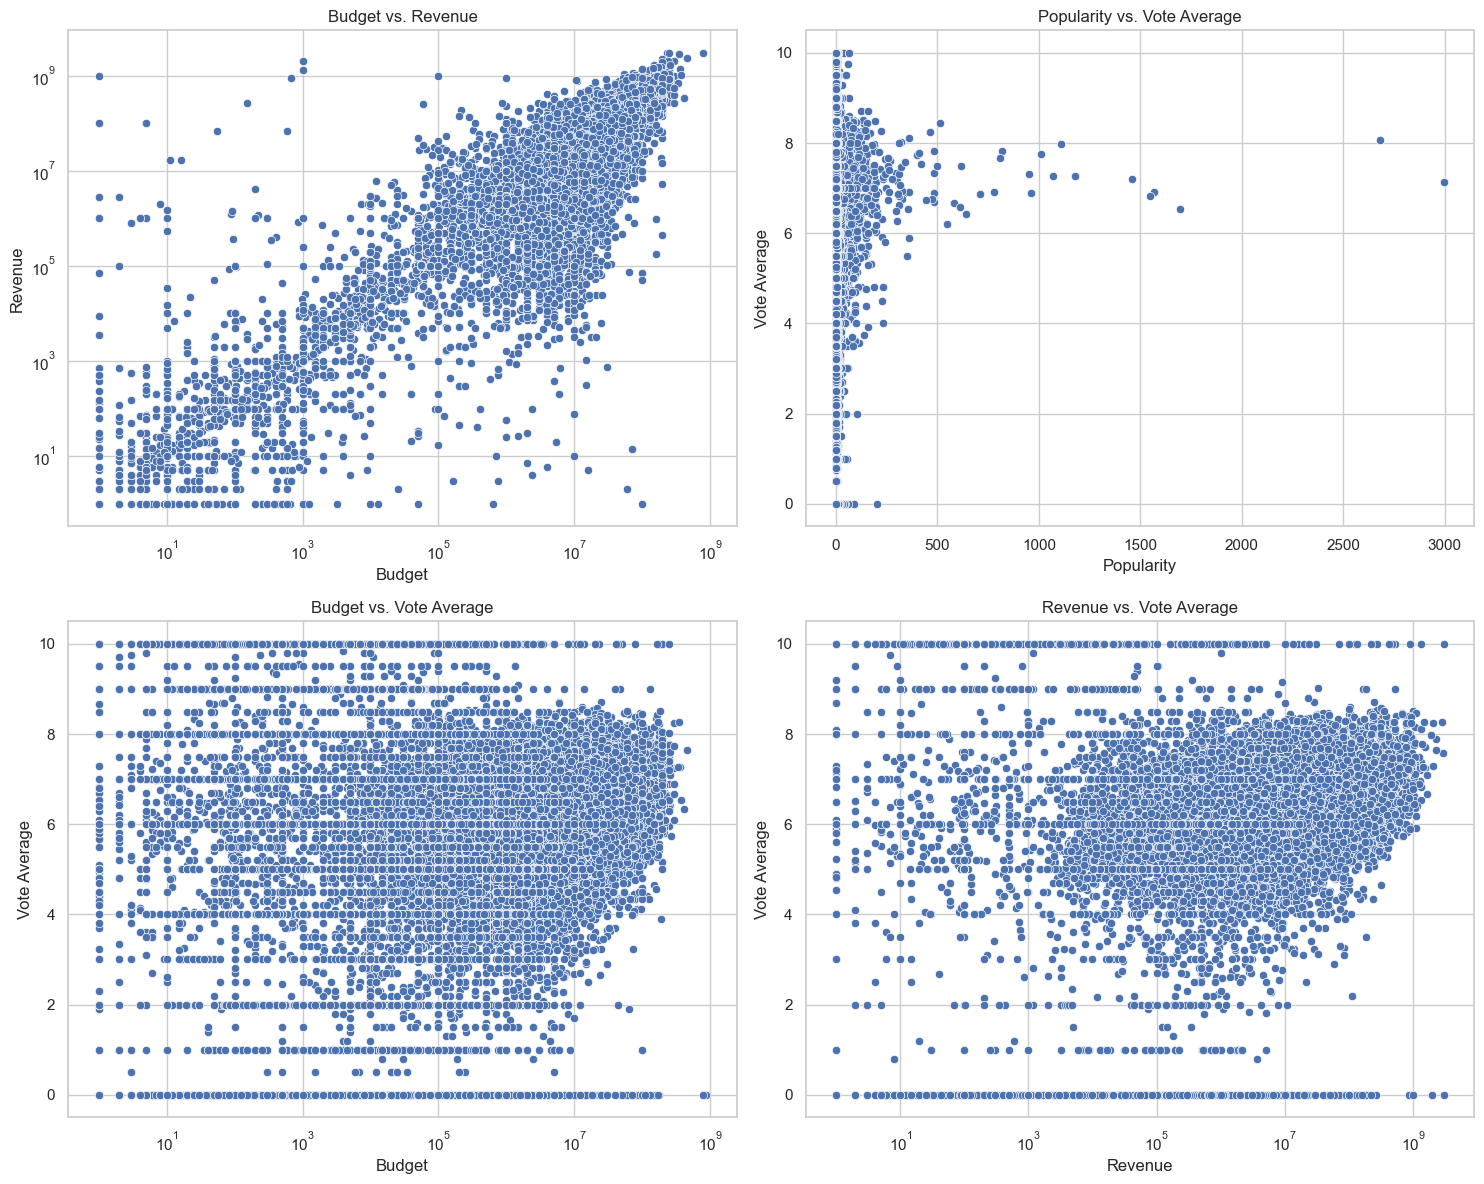

In [43]:
# Create 2x2 subplots to display four bivariate relationships
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))

# Budget vs. Revenue
sns.scatterplot(x="budget", y="revenue", data=df, ax=axes[0, 0])
axes[0, 0].set_title("Budget vs. Revenue")
axes[0, 0].set_xlabel("Budget")
axes[0, 0].set_ylabel("Revenue")
axes[0, 0].set_xscale("log")
axes[0, 0].set_yscale("log")

# Popularity vs. Vote Average
sns.scatterplot(x="popularity", y="average_rating", data=df, ax=axes[0, 1])
axes[0, 1].set_title("Popularity vs. Vote Average")
axes[0, 1].set_xlabel("Popularity")
axes[0, 1].set_ylabel("Vote Average")

# Budget vs. Vote Average
sns.scatterplot(x="budget", y="average_rating", data=df, ax=axes[1, 0])
axes[1, 0].set_title("Budget vs. Vote Average")
axes[1, 0].set_xlabel("Budget")
axes[1, 0].set_ylabel("Vote Average")
axes[1, 0].set_xscale("log")

# Revenue vs. Vote Average
sns.scatterplot(x="revenue", y="average_rating", data=df, ax=axes[1, 1])
axes[1, 1].set_title("Revenue vs. Vote Average")
axes[1, 1].set_xlabel("Revenue")
axes[1, 1].set_ylabel("Vote Average")
axes[1, 1].set_xscale("log")

plt.tight_layout()
plt.show()

### Genre Distribution 

#### Graph for Genre Distribution (Top 10)

C:\Users\hp\AppData\Local\Temp\ipykernel_6196\3411848514.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


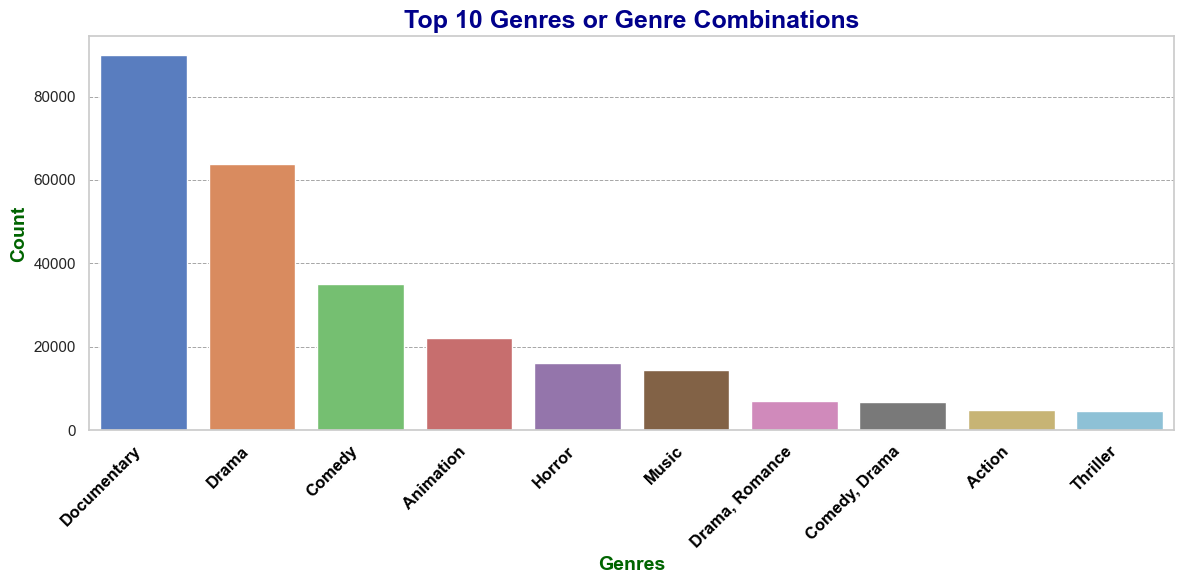

In [44]:
# Genre distribution
plt.figure(figsize=(12, 6))

if "genres" in df.columns:  # Check if 'genres' column exists
    genre_counts = df["genres"].value_counts().head(10)  # Top 10 genres or combinations
    sns.barplot(
        x=genre_counts.index, y=genre_counts.values, palette="muted"
    )  # Changed to a muted color palette

    # Improve text appearance
    plt.xticks(
        rotation=45, ha="right", fontsize=12, weight="bold", color="black"
    )  # Enhanced x-tick labels
    plt.title(
        "Top 10 Genres or Genre Combinations",
        fontsize=18,
        weight="bold",
        color="darkblue",
    )  # Enhanced title
    plt.xlabel(
        "Genres", fontsize=14, weight="bold", color="darkgreen"
    )  # Enhanced x-label
    plt.ylabel(
        "Count", fontsize=14, weight="bold", color="darkgreen"
    )  # Enhanced y-label

    plt.grid(  # Add grid for better readability
        axis="y", linestyle="--", linewidth=0.7, alpha=0.7, color="gray"
    )  # Vertical grid lines for better readability

    plt.tight_layout()  # Adjust layout to fit text
    plt.show()
else:

    print(
        "The 'genres' column is not found in your DataFrame."
    )  # Handle the case where 'genres' column is missing

### Multivariate Analysis

#### Scatter Plot for relationship between Budget & Revenue:

<Figure size 1800x100 with 0 Axes>

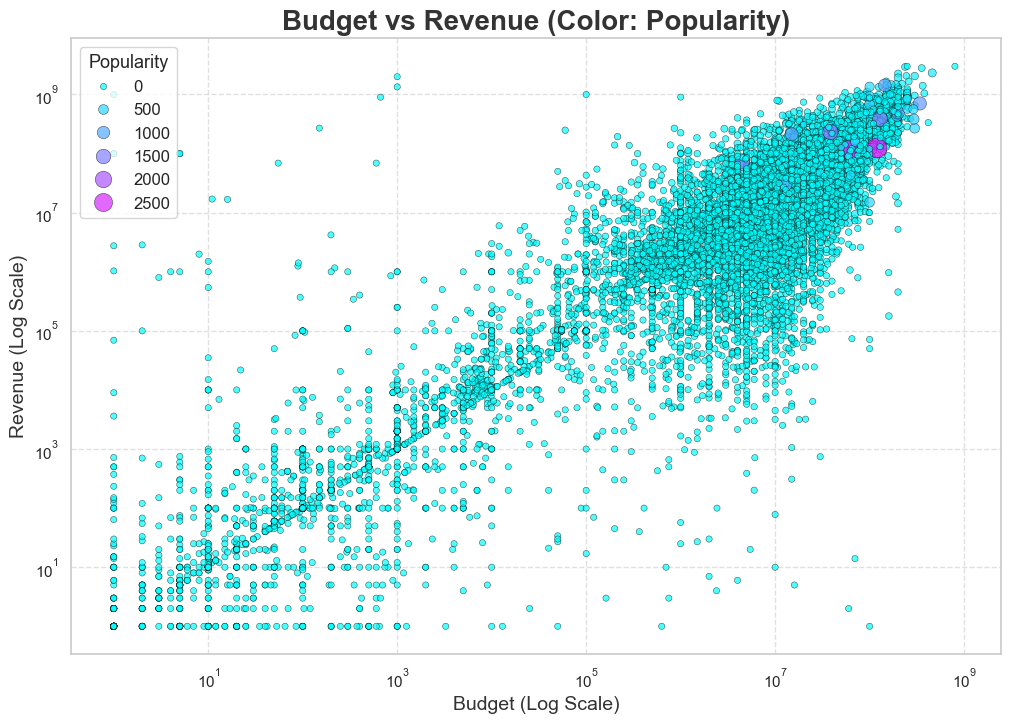

In [45]:
# Spacer to improve layout
plt.figure(figsize=(18, 1))
plt.show()

# Budget vs Revenue with Popularity Color
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df,
    x="budget",
    y="revenue",
    hue="popularity",
    size="popularity",
    palette="cool",
    sizes=(20, 200),
    alpha=0.7,
    edgecolor="black",
)
plt.xscale("log")  # Log scale for better visibility
plt.yscale("log")  # Log scale for better visibility
plt.title(
    "Budget vs Revenue (Color: Popularity)",
    fontsize=20,
    fontweight="bold",
    color="#333333",
)
plt.xlabel("Budget (Log Scale)", fontsize=14, color="#333333")
plt.ylabel("Revenue (Log Scale)", fontsize=14, color="#333333")
plt.legend(title="Popularity", loc="upper left", fontsize=12, title_fontsize="13")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

### Time Series Analysis

#### Line Graph for average revenue generated by movies over the years:

<Figure size 1800x100 with 0 Axes>

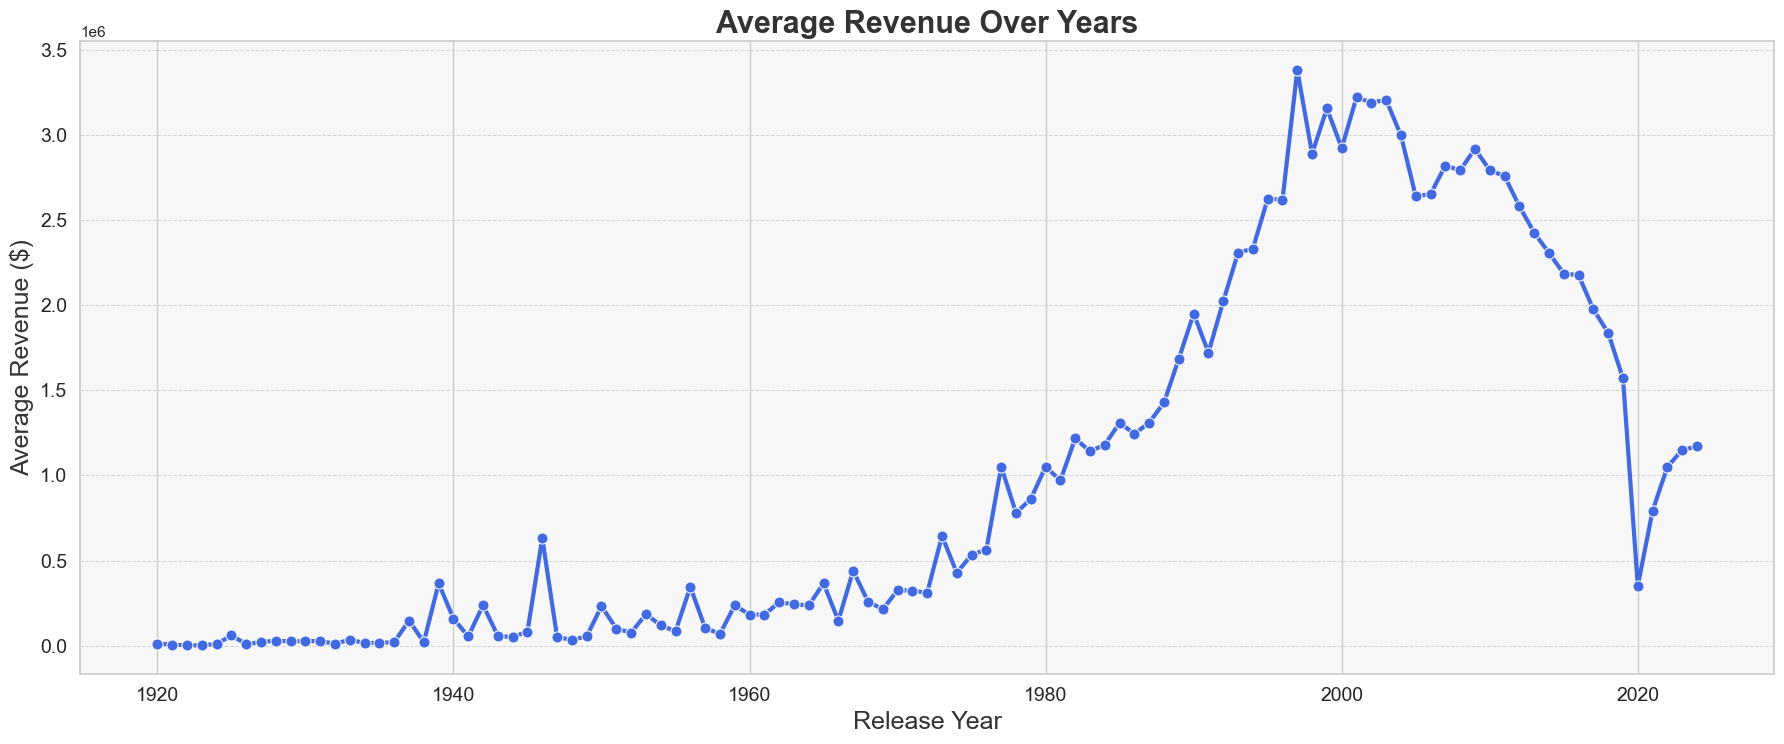

In [46]:
plt.figure(figsize=(18, 1))  # Spacer to improve layout
plt.show()

plt.figure(figsize=(18, 8))  # Time Series: Revenue Trend Over Time
plt.title("Average Revenue Over Years", fontsize=22, fontweight="bold", color="#333333")

df_yearly_revenue = (
    df.groupby("release_year")["revenue"].mean().reset_index()
)  # Calculate average revenue per year

sns.lineplot(  # Plot average revenue with markers
    data=df_yearly_revenue,
    x="release_year",
    y="revenue",
    color="royalblue",
    linewidth=3,
    marker="o",  # Add markers to the line
    markersize=8,  # Size of the markers
)

plt.xlabel("Release Year", fontsize=18, color="#333333")
plt.ylabel(
    "Average Revenue ($)", fontsize=18, color="#333333"
)  # Added currency sign for clarity
plt.tick_params(axis="both", labelsize=14)
plt.grid(True, linestyle="--", linewidth=0.7, color="lightgray", which="both", axis="y")

plt.gca().set_facecolor(
    "#f7f7f7"
)  # Adding a light background color for better aesthetics

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Tight layout adjustment
plt.show()

#### Separate graphs for each genre showing popularity over time: 

<Figure size 1700x100 with 0 Axes>

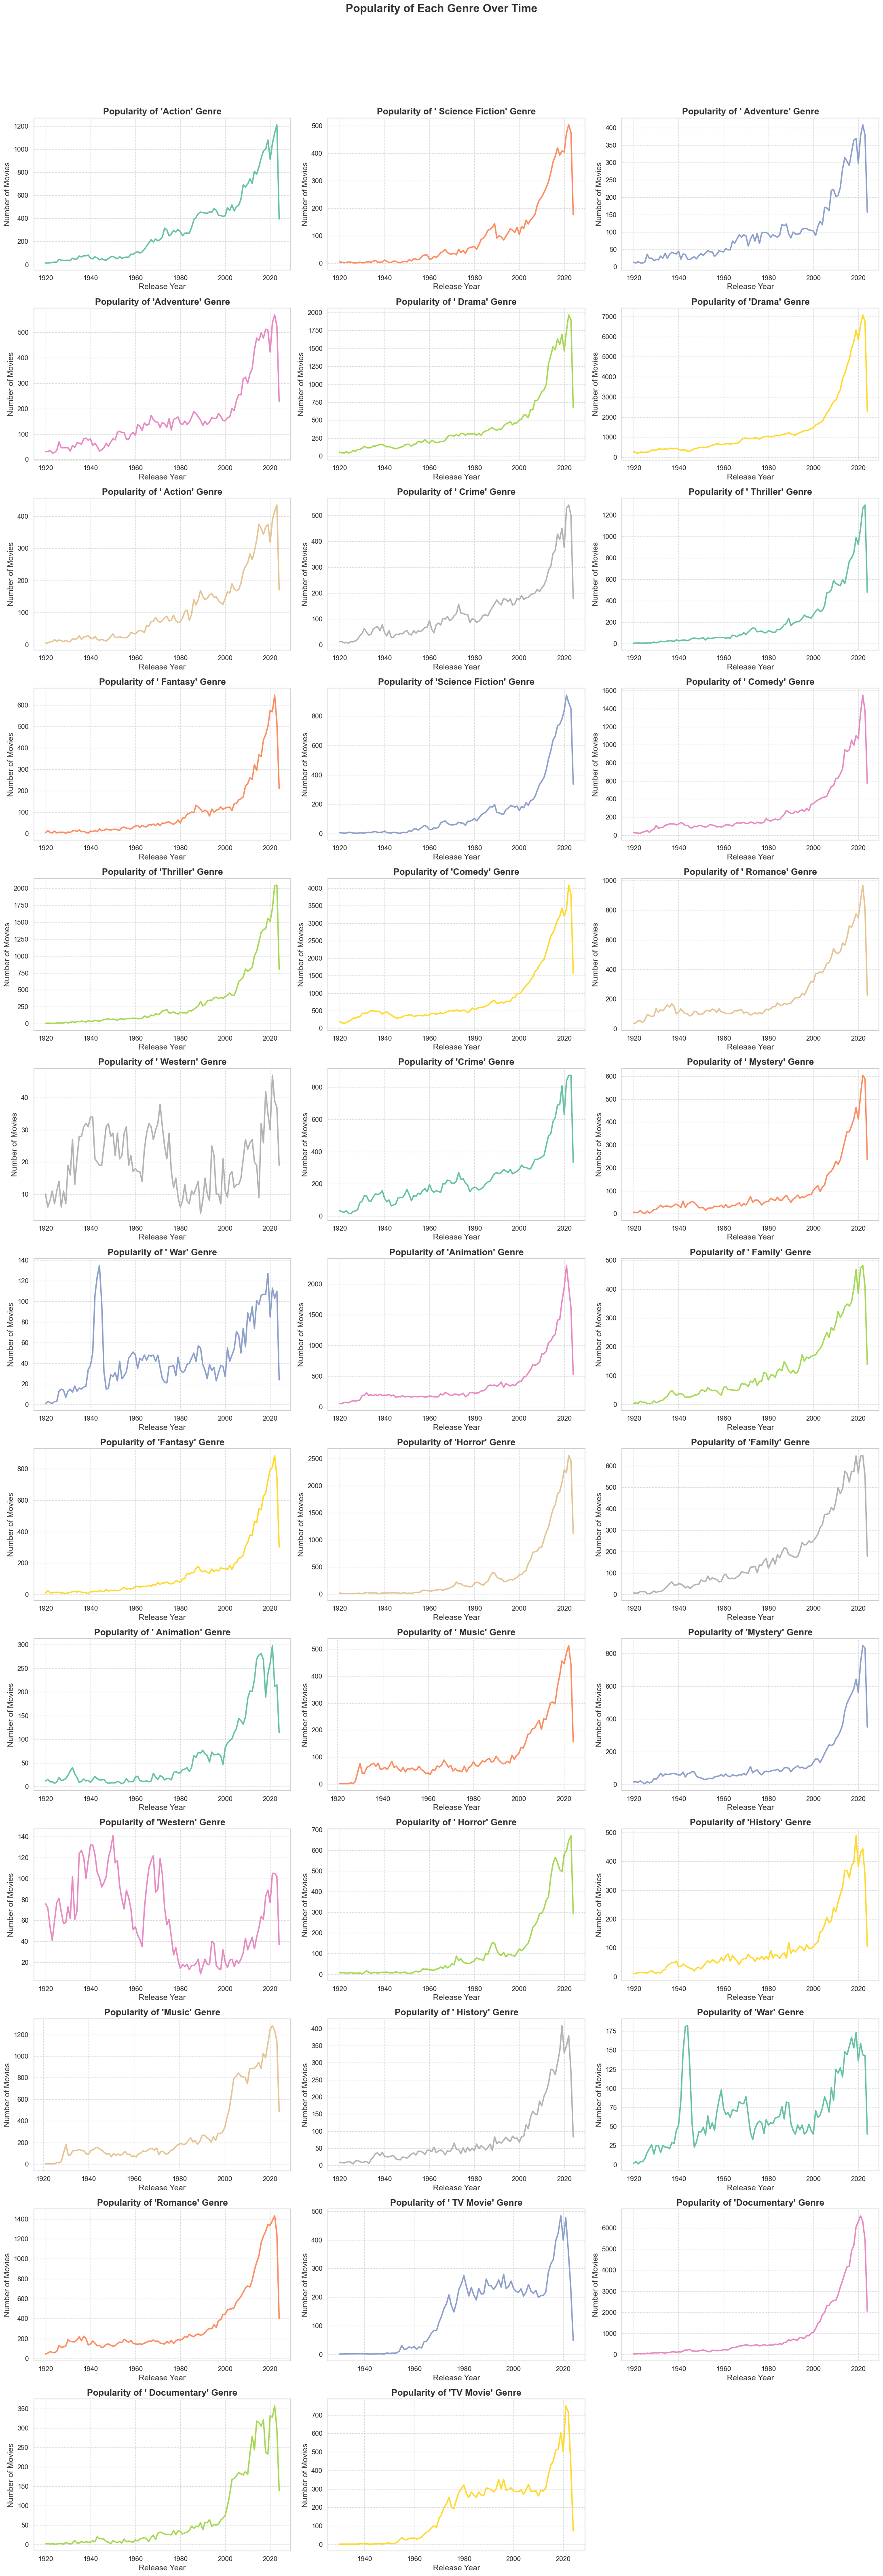

In [47]:
plt.figure(figsize=(17, 1))  # Spacer to improve layout
plt.show()

unique_genres = df["genres"].str.split(",").explode().unique()  # Get unique genres
num_genres = len(unique_genres)  # Number of genres

fig, axes = plt.subplots(  # Create subplots for each genre, arranged in 3 columns
    num_genres // 3 + (num_genres % 3 > 0), 3, figsize=(22, (num_genres // 3 + 1) * 5)
)
fig.suptitle(
    "Popularity of Each Genre Over Time",
    fontsize=20,
    fontweight="bold",
    color="#333333",
)

colors = sns.color_palette("Set2", num_genres)  # Color palette for different genres

# Iterate through unique genres and plot their popularity over time
for i, genre in enumerate(
    unique_genres
):  # Create a count of movies by year for the current genre

    df_genre_year = (
        df[df["genres"].str.contains(genre)]
        .groupby("release_year")
        .size()
        .reset_index(name="count")
    )

    # Calculate the row and column for the subplot
    row = i // 3
    col = i % 3

    sns.lineplot(  # Plot genre popularity
        data=df_genre_year,
        x="release_year",
        y="count",
        linewidth=2.5,
        ax=axes[row, col],
        color=colors[i % len(colors)],  # Use distinct colors for each genre
    )

    axes[row, col].set_title(  # Set titles and labels
        f"Popularity of '{genre}' Genre",
        fontsize=16,
        fontweight="bold",
        color="#333333",
    )
    axes[row, col].set_xlabel("Release Year", fontsize=14, color="#333333")
    axes[row, col].set_ylabel("Number of Movies", fontsize=14, color="#333333")
    axes[row, col].tick_params(axis="both", labelsize=12)

    axes[row, col].grid(
        True, linestyle="--", alpha=0.7
    )  # Add grid for better readability

for j in range(i + 1, num_genres // 3 * 3 + 3):  # Remove any empty subplots
    fig.delaxes(axes.flatten()[j])

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to prevent overlap
plt.show()

### Outlier Detection in "Revenue"

<Figure size 1800x100 with 0 Axes>

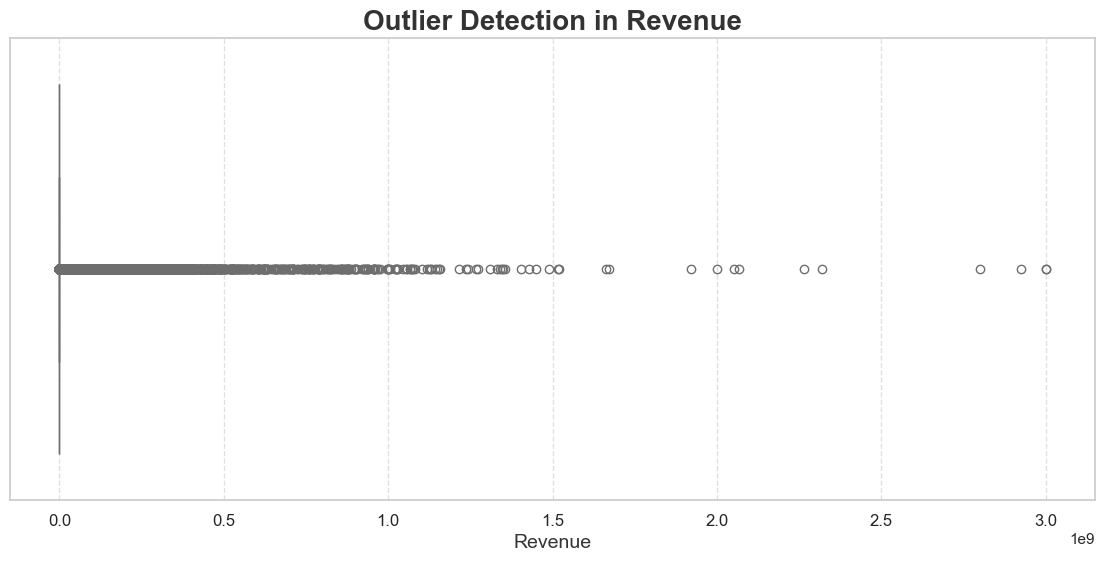

In [48]:
plt.figure(figsize=(18, 1))  # Spacer to improve layout
plt.show()

plt.figure(figsize=(14, 6))  # Outlier Detection: Revenue
sns.boxplot(x=df["revenue"], color="lightcoral")  # Boxplot to show outliers in revenue
plt.title(
    "Outlier Detection in Revenue", fontsize=20, fontweight="bold", color="#333333"
)
plt.xlabel("Revenue", fontsize=14, color="#333333")
plt.tick_params(axis="both", labelsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.show()

### Correlation Heatmap for Selected Features

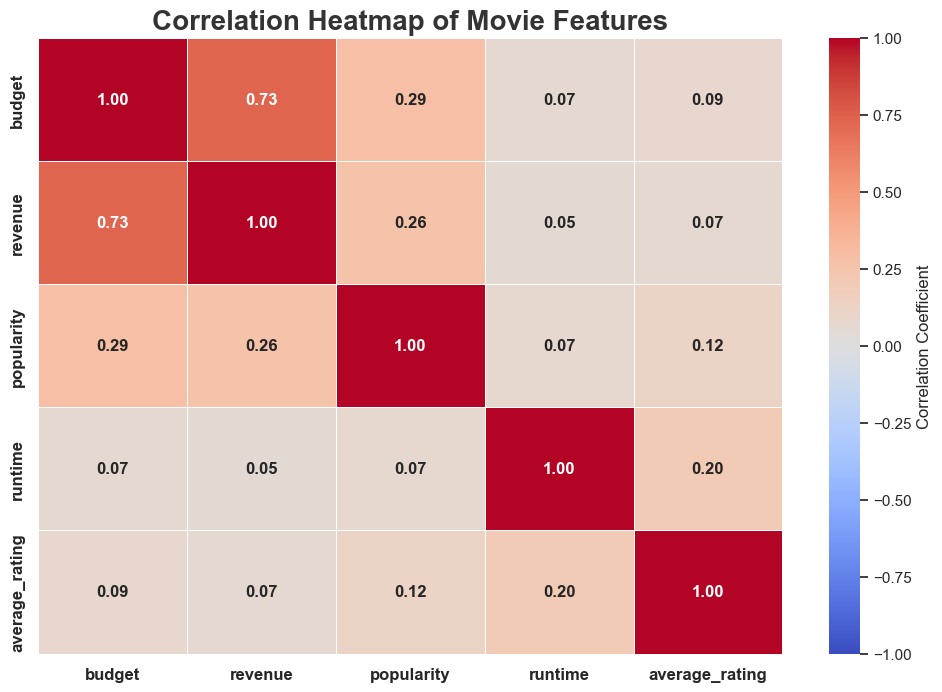

In [49]:
# Correlation Heatmap for Selected Features
plt.figure(figsize=(12, 8))
correlation_matrix = df[
    ["budget", "revenue", "popularity", "runtime", "average_rating"]
].corr()  # Calculate correlations

sns.heatmap(  # Create the heatmap with improvements
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",  # Changed color palette to 'coolwarm'
    cbar_kws={"label": "Correlation Coefficient"},  # Color bar label
    linewidths=0.5,  # Adds lines between cells for better separation
    linecolor="white",  # Change line color for better contrast
    vmin=-1,
    vmax=1,
    annot_kws={"size": 12, "weight": "bold"},  # Make annotations bolder
    cbar=True,
)  # Show color bar

plt.title(
    "Correlation Heatmap of Movie Features",
    fontsize=20,
    fontweight="bold",
    color="#333333",
)  # Title
plt.xticks(fontsize=12, fontweight="bold")  # Bold font for x-axis labels
plt.yticks(fontsize=12, fontweight="bold")  # Bold font for y-axis labels
plt.show()

In [50]:
df.head()

title  average_rating  vote_count release_date     revenue  \
0        Inception           8.364       34495   2010-07-15   825532764   
1     Interstellar           8.417       32571   2014-11-05   701729206   
2  The Dark Knight           8.512       30619   2008-07-16  1004558444   
3           Avatar           7.573       29815   2009-12-15  2923706026   
4     The Avengers           7.710       29166   2012-04-25  1518815515   

   runtime     budget language  popularity  \
0      148  160000000  English      83.952   
1      169  165000000  English     140.241   
2      152  185000000  English     130.643   
3      162  237000000  English      79.932   
4      143  220000000  English      98.082   

                                        genres  release_year  release_month  \
0           Action, Science Fiction, Adventure          2010              7   
1            Adventure, Drama, Science Fiction          2014             11   
2               Drama, Action, Crime, Thriller          2008              7   
3  Action, Adventure, Fantasy, Science Fiction          2009             12   
4           Science Fiction, Action, Adventure          2012              4   

   release_day_of_week  
0                    3  
1                    2  
2                    2  
3                    1  
4                    2

#### Scaling all Numerical columns:

In [51]:
scaler = StandardScaler()  # Initialize the scaler

numeric_cols = [  # Select numeric columns to scale
    "budget",
    "revenue",
    "runtime",
    "popularity",
    "vote_count",
    "average_rating",
]  # Add any other relevant numeric features

df[numeric_cols] = scaler.fit_transform(
    df[numeric_cols]
)  # Fit and transform the selected columns

# Check the scaling
print(df[numeric_cols].head())  # Display the first few rows of the scaled features

      budget     revenue   runtime  popularity  vote_count  average_rating
0  22.526905   30.896694  1.326580    7.478575   68.592200        1.624086
1  23.233560   26.254128  1.666834   12.620117   64.761258        1.640337
2  26.060180   37.610058  1.391390   11.743418   60.874563        1.669466
3  33.409391  109.577038  1.553416    7.111380   59.273691        1.381549
4  31.006764   56.894416  1.245567    8.769235   57.981445        1.423556


In [52]:
df.head()

title  average_rating  vote_count release_date     revenue  \
0        Inception        1.624086   68.592200   2010-07-15   30.896694   
1     Interstellar        1.640337   64.761258   2014-11-05   26.254128   
2  The Dark Knight        1.669466   60.874563   2008-07-16   37.610058   
3           Avatar        1.381549   59.273691   2009-12-15  109.577038   
4     The Avengers        1.423556   57.981445   2012-04-25   56.894416   

    runtime     budget language  popularity  \
0  1.326580  22.526905  English    7.478575   
1  1.666834  23.233560  English   12.620117   
2  1.391390  26.060180  English   11.743418   
3  1.553416  33.409391  English    7.111380   
4  1.245567  31.006764  English    8.769235   

                                        genres  release_year  release_month  \
0           Action, Science Fiction, Adventure          2010              7   
1            Adventure, Drama, Science Fiction          2014             11   
2               Drama, Action, Crime, Thriller          2008              7   
3  Action, Adventure, Fantasy, Science Fiction          2009             12   
4           Science Fiction, Action, Adventure          2012              4   

   release_day_of_week  
0                    3  
1                    2  
2                    2  
3                    1  
4                    2

#### Encoding of "Genre" & "language"

In [ ]:
# One-Hot Encode 'language'
df = pd.get_dummies(df, columns=["language"], prefix="lang")

# For 'genres', which has multiple values per row, we can use a different approach

# 1. First, split the genres into a list of individual genres
df["genres"] = df["genres"].str.split(",")

# 2. Use MultiLabelBinarizer to create a one-hot encoding for multiple genres per movie
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
genres_encoded = mlb.fit_transform(df["genres"])

# 3. Convert this back into a DataFrame with genre names as columns
genres_df = pd.DataFrame(genres_encoded, columns=mlb.classes_)

# 4. Merge back into the original DataFrame
df = df.join(genres_df)

Dropping the orignal "**genres**" column as its not needed...

In [ ]:
df = df.drop(["genres"], axis=1)

#### Remove target and any irrelevant columns

In [ ]:
X = df.drop(["average_rating", "title", "release_date"], axis=1)
y = df["average_rating"]

#### Splitting Data into **Training** and **Testing** Portions

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#### Training Model **Random Forrest Regressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize and train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.12748880471882013


#### Evaluation metrics Calculations

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the results
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-Squared (R²): {r2}")

Mean Squared Error (MSE): 0.12748880471882013
Root Mean Squared Error (RMSE): 0.3570557445537323
Mean Absolute Error (MAE): 0.18075462898642675
R-Squared (R²): 0.872345816639875


#### Tuning with **RandomizedSearchCV**.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Expanded parameter grid
param_grid = {
    "n_estimators": [50, 100, 150, 200],  # Wider range
    "max_depth": [10, 20, 30, None],  # Include more depth options
    "min_samples_split": [2, 5, 10],  # Wider options for splits
    "min_samples_leaf": [1, 2, 4],  # Add more options for leaf size
    "max_features": ["sqrt", "log2"],  # Valid options for regression
}

# Initialize RandomizedSearchCV with the expanded grid
random_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions=param_grid,
    n_iter=10,  # Increased iterations for more combinations
    cv=3,  # 3-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1,  # Use all processors
)

# Fit the search to the full training data
random_search.fit(X_train, y_train)

# Retrieve and evaluate the best model
best_model = random_search.best_estimator_
y_pred_best = best_model.predict(X_test)

best_mse = mean_squared_error(y_test, y_pred_best)
best_rmse = np.sqrt(best_mse)
best_mae = mean_absolute_error(y_test, y_pred_best)
best_r2 = r2_score(y_test, y_pred_best)

print(f"Tuned Model MSE: {best_mse}")
print(f"Tuned Model RMSE: {best_rmse}")
print(f"Tuned Model MAE: {best_mae}")
print(f"Tuned Model R-Squared (R²): {best_r2}")

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Tuned Model MSE: 0.12555158075115805
Tuned Model RMSE: 0.35433258494126396
Tuned Model MAE: 0.19298574519804904
Tuned Model R-Squared (R²): 0.8742855535769573


#### Scatter Plot for comparison of **Actual** vs. **Predicted** ratings for Original Model and Tuned Model

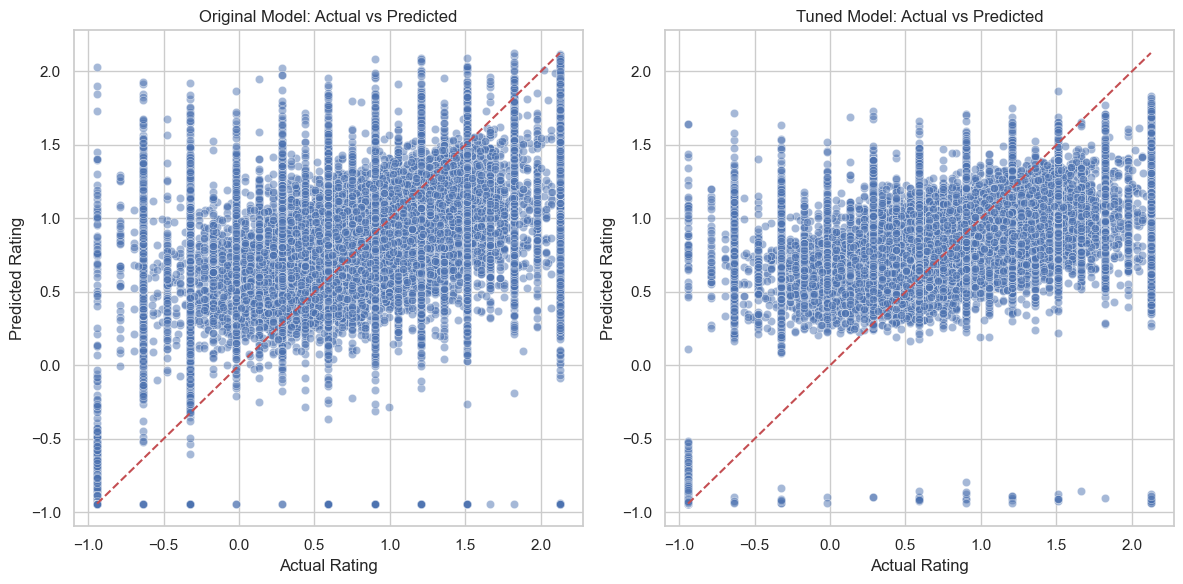

In [ ]:
plt.figure(figsize=(12, 6))

# Plot for Original Model
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot(
    [y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--"
)  # Diagonal line
plt.title("Original Model: Actual vs Predicted")
plt.xlabel("Actual Rating")
plt.ylabel("Predicted Rating")

# Plot for Tuned Model
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_pred_best, alpha=0.5)
plt.plot(
    [y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--"
)  # Diagonal line
plt.title("Tuned Model: Actual vs Predicted")
plt.xlabel("Actual Rating")
plt.ylabel("Predicted Rating")

plt.tight_layout()
plt.show()

#### Calculation of **Residuals** for both models

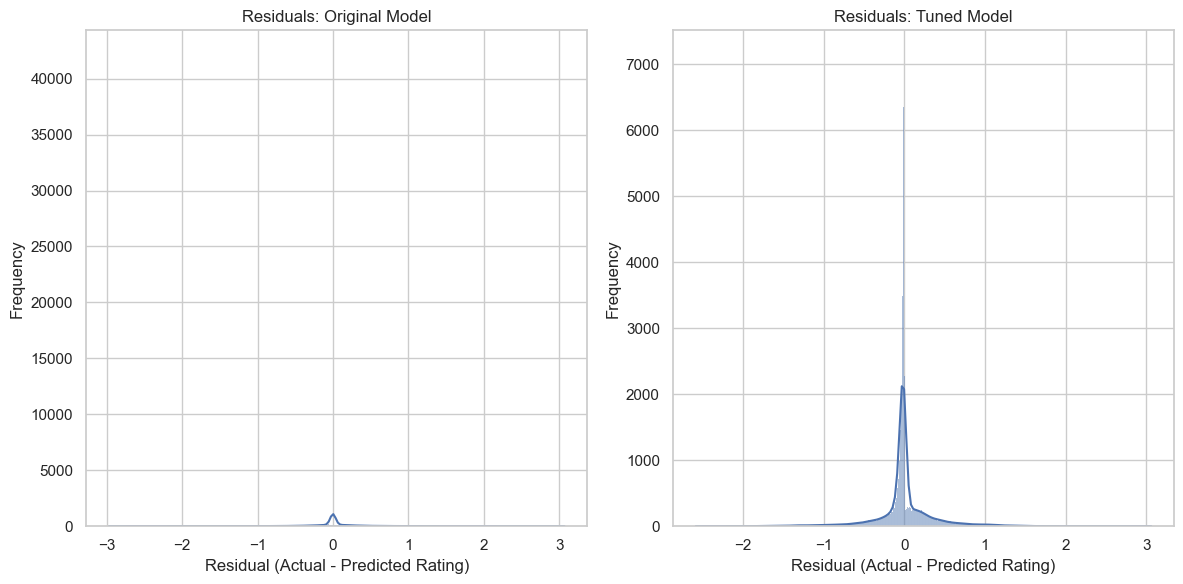

In [ ]:
residual_original = y_test - y_pred
residual_tuned = y_test - y_pred_best

# Plot residuals distribution
plt.figure(figsize=(12, 6))

# Residuals for Original Model
plt.subplot(1, 2, 1)
sns.histplot(residual_original, kde=True)
plt.title("Residuals: Original Model")
plt.xlabel("Residual (Actual - Predicted Rating)")
plt.ylabel("Frequency")

# Residuals for Tuned Model
plt.subplot(1, 2, 2)
sns.histplot(residual_tuned, kde=True)
plt.title("Residuals: Tuned Model")
plt.xlabel("Residual (Actual - Predicted Rating)")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

#### Testing the Fine Tuned Model on random test data from dataset... 

Testing several times with random data from sample data.

In [ ]:
# Sample a few random instances from the test set
sample_data = X_test.sample(
    n=5
)  # Adjust `n` for the number of samples you want to test

# Make predictions on this sample data
sample_predictions = best_model.predict(sample_data)

# Compare predictions with actual values
sample_results = pd.DataFrame(
    {
        "Actual Rating": y_test.loc[sample_data.index].values,
        "Predicted Rating": sample_predictions,
    }
)

# Display the comparison
print(sample_results)

   Actual Rating  Predicted Rating
0       0.544783          0.529508
1      -0.940485         -0.919975
2       1.205856          1.057860
3      -0.940485         -0.926908
4      -0.940485         -0.912781


In [ ]:
# Sample a few random instances from the test set, including the titles
sample_data = X_test.sample(
    n=5
)  # Adjust `n` for the number of samples you want to test
sample_titles = df.loc[
    sample_data.index, "title"
]  # Retrieve the titles for the sampled data
sample_actual_ratings = y_test.loc[
    sample_data.index
]  # Actual ratings for the sampled data

# Make predictions on this sample data
sample_predictions = best_model.predict(sample_data)

# Display each movie title with its actual and predicted rating
print("Sample Predictions:")
print("-" * 50)
for title, actual, predicted in zip(
    sample_titles, sample_actual_ratings, sample_predictions
):
    print(f"Title: {title}")
    print(f"  Actual Rating    : {actual:.2f}")
    print(f"  Predicted Rating : {predicted:.2f}")
    print("-" * 50)

Sample Predictions:
--------------------------------------------------
Title: Face to Face
  Actual Rating    : 1.82
  Predicted Rating : 0.99
--------------------------------------------------
Title: The Two Mr. Kissels
  Actual Rating    : 0.75
  Predicted Rating : 1.01
--------------------------------------------------
Title: De mujer a mujer
  Actual Rating    : 0.59
  Predicted Rating : 0.72
--------------------------------------------------
Title: This Is My Moment
  Actual Rating    : -0.94
  Predicted Rating : -0.93
--------------------------------------------------
Title: Into the Blue
  Actual Rating    : 1.21
  Predicted Rating : 0.65
--------------------------------------------------


In [ ]:
# Sample a few random instances from the test set, including titles
sample_data = X_test.sample(
    n=5
)  # Removes the fixed random state for a new random sample each time

sample_titles = df.loc[
    sample_data.index, "title"
]  # Retrieve the titles for the sampled data
sample_actual_ratings = y_test.loc[
    sample_data.index
]  # Actual ratings for the sampled data

# Make predictions on this sample data
sample_predictions = best_model.predict(sample_data)

# Create a DataFrame to display the results
sample_results = pd.DataFrame(
    {
        "Title": sample_titles.values,
        "Actual Rating": sample_actual_ratings.values,
        "Predicted Rating": sample_predictions,
    }
)

# Display the results with formatting to match the desired style
print("Sample Predictions:")
print(
    sample_results.to_string(index=False, col_space=20)
) 

Sample Predictions:
                                            Title        Actual Rating     Predicted Rating
                                  Cześć kapitanie            -0.940485            -0.903705
                                     Aufschneider             1.543138             1.074976
                                        Wolfsburg             1.107738             0.873548
                                       Moving Day             1.819096             1.436063
The Old Gotthard Tunnel Route - Driver's Eye View            -0.940485            -0.919829


#### Saving the **Random Forrest Model** 

In [ ]:
joblib.dump(best_model, "best_random_forest_model.joblib")
print("Model saved successfully!")

Model saved successfully!


##### Till now Random Forrest Regressor used as a start... 

##### Testing other models in search for better accuracy.
##### using *Gradient Boosting Regressor* and *XGBoost Regressor*

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

# Define the models to train
models = {
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42),
}

# Dictionary to store trained models and their performance metrics
trained_models = {}
metrics = {}

# Train, evaluate, and save each model
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate performance metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Save metrics for comparison
    metrics[name] = {"MSE": mse, "RMSE": rmse, "MAE": mae, "R²": r2}

    # Print metrics in a user-friendly format
    print(f"{name} Performance:")
    print(f"  Mean Squared Error (MSE): {mse:.4f}")
    print(f"  Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"  Mean Absolute Error (MAE): {mae:.4f}")
    print(f"  R-Squared (R²): {r2:.4f}\n")

    # Save the trained model
    model_filename = f"{name.replace(' ', '_')}_model.joblib"
    joblib.dump(model, model_filename)
    trained_models[name] = model_filename

# Display all model performance metrics
print("\nOverall Model Metrics Comparison:")
for name, metric in metrics.items():
    print(f"\n{name}:")
    print(f"  Mean Squared Error (MSE): {metric['MSE']:.4f}")
    print(f"  Root Mean Squared Error (RMSE): {metric['RMSE']:.4f}")
    print(f"  Mean Absolute Error (MAE): {metric['MAE']:.4f}")
    print(f"  R-Squared (R²): {metric['R²']:.4f}")

Gradient Boosting Performance:
  Mean Squared Error (MSE): 0.1353
  Root Mean Squared Error (RMSE): 0.3679
  Mean Absolute Error (MAE): 0.1953
  R-Squared (R²): 0.8645

XGBoost Performance:
  Mean Squared Error (MSE): 0.1236
  Root Mean Squared Error (RMSE): 0.3516
  Mean Absolute Error (MAE): 0.1825
  R-Squared (R²): 0.8762


Overall Model Metrics Comparison:

Gradient Boosting:
  Mean Squared Error (MSE): 0.1353
  Root Mean Squared Error (RMSE): 0.3679
  Mean Absolute Error (MAE): 0.1953
  R-Squared (R²): 0.8645

XGBoost:
  Mean Squared Error (MSE): 0.1236
  Root Mean Squared Error (RMSE): 0.3516
  Mean Absolute Error (MAE): 0.1825
  R-Squared (R²): 0.8762


In [ ]:
# Define the sample size for demonstration
sample_size = 10

# Select a random sample from the test set for prediction demonstration
sample_indices = np.random.choice(X_test.index, size=sample_size, replace=False)
X_sample = X_test.loc[sample_indices]
y_sample_true = y_test.loc[sample_indices]

print("\nSample Predictions:")

# Load only the scaler fitted to the 'average_rating' column
rating_scaler = StandardScaler()
rating_scaler.fit(df[["average_rating"]])  # Fit on the original average_rating column

# List of saved model files
model_files = {
    "Gradient Boosting": "Gradient_Boosting_model.joblib",
    "XGBoost": "XGBoost_model.joblib",
}

# Load, predict, and display sample predictions for each model
for model_name, model_file in model_files.items():
    # Load the saved model
    model = joblib.load(model_file)

    # Make predictions on the sample data
    y_sample_pred = model.predict(X_sample)

    # Inverse transform prediction and actual to the original scale for `average_rating`
    y_sample_pred_original = rating_scaler.inverse_transform(
        y_sample_pred.reshape(-1, 1)
    ).flatten()
    y_sample_true_original = rating_scaler.inverse_transform(
        y_sample_true.values.reshape(-1, 1)
    ).flatten()

    # Display predictions alongside true values
    print(f"\n{model_name} Sample Predictions:")
    for i, (pred, true) in enumerate(
        zip(y_sample_pred_original, y_sample_true_original), start=1
    ):
        print(f"  Sample {i} - Predicted: {pred:.2f}, Actual: {true:.2f}")


Sample Predictions:

Gradient Boosting Sample Predictions:
  Sample 1 - Predicted: -0.91, Actual: -0.94
  Sample 2 - Predicted: 0.92, Actual: 0.90
  Sample 3 - Predicted: -0.93, Actual: -0.94
  Sample 4 - Predicted: 1.11, Actual: 1.21
  Sample 5 - Predicted: -0.93, Actual: -0.94
  Sample 6 - Predicted: -0.93, Actual: -0.94
  Sample 7 - Predicted: -0.96, Actual: -0.94
  Sample 8 - Predicted: -0.93, Actual: -0.94
  Sample 9 - Predicted: -0.93, Actual: -0.94
  Sample 10 - Predicted: 1.30, Actual: 1.41

XGBoost Sample Predictions:
  Sample 1 - Predicted: -0.93, Actual: -0.94
  Sample 2 - Predicted: 0.99, Actual: 0.90
  Sample 3 - Predicted: -0.94, Actual: -0.94
  Sample 4 - Predicted: 1.24, Actual: 1.21
  Sample 5 - Predicted: -0.94, Actual: -0.94
  Sample 6 - Predicted: -0.93, Actual: -0.94
  Sample 7 - Predicted: -0.96, Actual: -0.94
  Sample 8 - Predicted: -0.94, Actual: -0.94
  Sample 9 - Predicted: -0.93, Actual: -0.94
  Sample 10 - Predicted: 1.31, Actual: 1.41


### Final Model Comparison Summary

A summary of the evaluation metrics for the three trained models (Gradient Boosting, XGBoost, and Random Forest Regressor):

#### **1. Gradient Boosting**
- **Mean Squared Error (MSE)**: 0.1353
- **Root Mean Squared Error (RMSE)**: 0.3679
- **Mean Absolute Error (MAE)**: 0.1953
- **R-Squared (R²)**: 0.8645

#### **2. XGBoost**
- **Mean Squared Error (MSE)**: 0.1236
- **Root Mean Squared Error (RMSE)**: 0.3516
- **Mean Absolute Error (MAE)**: 0.1825
- **R-Squared (R²)**: 0.8762

#### **3. Random Forest Regressor**
- **Mean Squared Error (MSE)**: 0.1275
- **Root Mean Squared Error (RMSE)**: 0.3571
- **Mean Absolute Error (MAE)**: 0.1808
- **R-Squared (R²)**: 0.8723

### **Key Insights:**
- **XGBoost** achieved the best performance with the lowest MSE and RMSE, and the highest R-Squared (R²), indicating the best fit to the data among the three models.
- **Random Forest Regressor** and **Gradient Boosting** have similar performance, but XGBoost slightly outperforms them in terms of both MSE and R².
- All models demonstrate relatively good predictive performance with R² values above 0.86, indicating that they explain over 86% of the variance in the dataset.

### **Final Model Selection:**
Based on the comparison, **XGBoost** would be the preferred model due to its superior performance in terms of both prediction accuracy (low MSE, RMSE) and goodness-of-fit (high R²).

